# Seaborn - KDE(Kernel Density Estimation) Plot

커널 밀도 곡선

## #01. 커널 밀도의 이해

특정 변수의 확률 분포를 나타내는 방법 중 하나로 데이터의 분포를 부드럽게 표현하는 형태.

커널 밀도 추정은 히스토그램과 같은 이산적인 분포를 부드럽게 곡선으로 변환하여 데이터의 특성을 시각적으로 뚜렷하게 표현할 수 있게 한다. 

`BoxPlot`, `Histogram`과 같이 데이터의 분포를 확인하기 위해 사용한다.

## #01. 준비작업

### [1] 패키치 참조

In [9]:
import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel

import warnings
warnings.filterwarnings(action='ignore')

### [2] 그래프 초기화

In [5]:
plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams["font.size"] =12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

### [3] 데이터 가져오기

In [6]:
origin = read_excel('https://data.hossam.kr/pydata/iris.xlsx')
origin

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### [4] 데이터 전처리

범주형 데이터에 대한 카테고리 타입 변환

In [7]:
df = origin.astype({"Species": "category"})
df.dtypes

Sepal.Length     float64
Sepal.Width      float64
Petal.Length     float64
Petal.Width      float64
Species         category
dtype: object

## #02. 일변량 커널 밀도

### [1] 기본 사용 방법

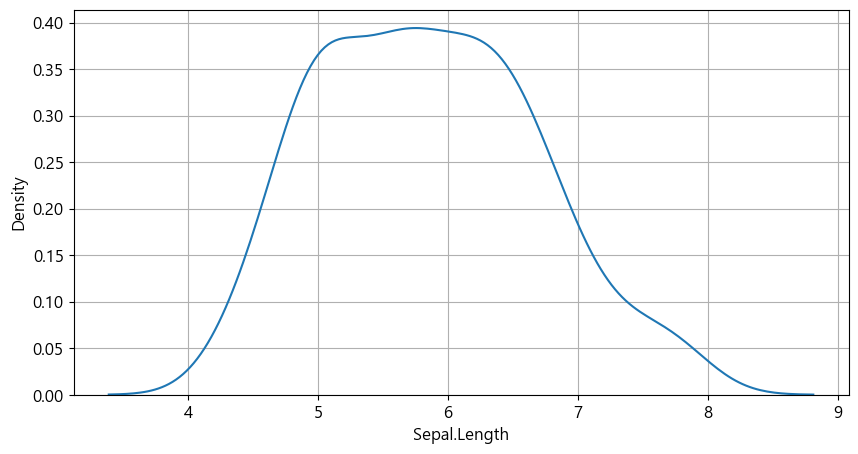

In [10]:
plt.figure(figsize=(10, 5), dpi=100)
sb.kdeplot(data=df, x="Sepal.Length")
plt.grid()
plt.show()
plt.close()

### [2] 가로로 표시하기


$x$ 파라미터 대신 $y$ 파라미터를 사용한다.

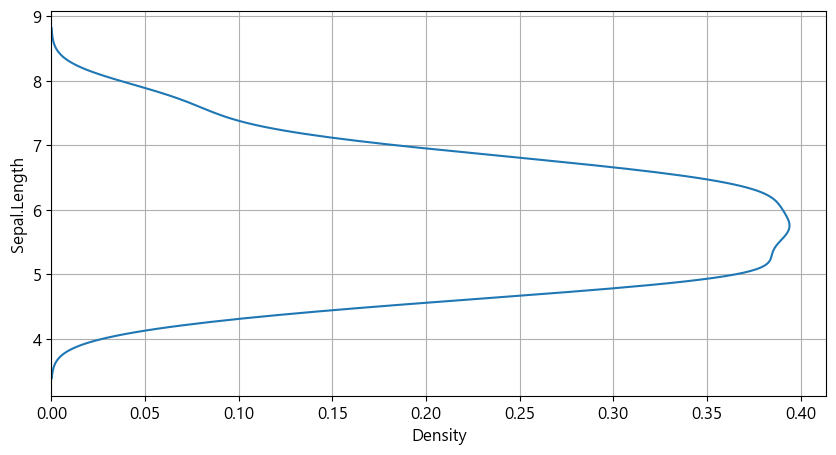

In [11]:
plt.figure(figsize=(10, 5), dpi=100)
sb.kdeplot(data=df, y="Sepal.Length")
plt.grid()
plt.show()
plt.close()

### [3] 다중 분포

데이터프레임을 `data` 파라미터에 적용하면서 `x`나 `y`파라미터를 지정하지 않으면 모든 연속형 변수에 대한 커널 밀도 곡선이 표현된다.

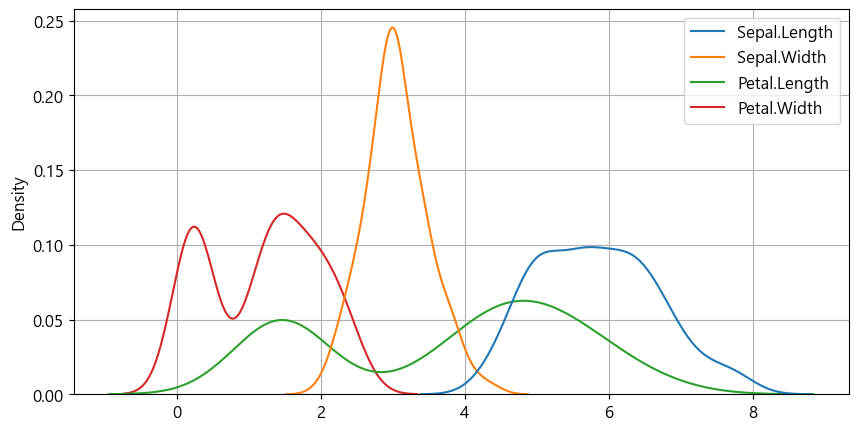

In [12]:
plt.figure(figsize=(10, 5), dpi=100)
sb.kdeplot(data=df)
plt.grid()
plt.show()
plt.close()

### [4] 곡선의 내부를 색상으로 채우기

`fill=True` 파라미터를 설정하면 곡선 내부에 색상이 표시된다.

이 때, `alpha` 파라미터를 `0~1`사이의 값으로 설정하여 면의 투명도를 조절할 수 있다. 

`0=투명`, `1=불투명`

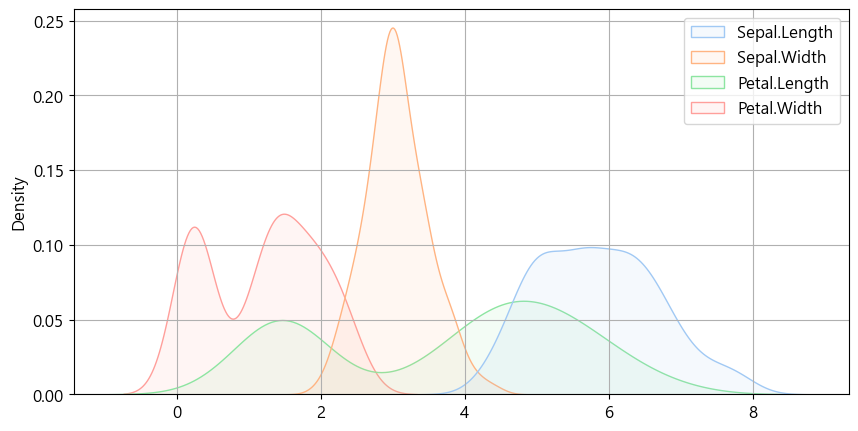

In [13]:
plt.figure(figsize=(10, 5), dpi=100)
sb.kdeplot(data=df, fill=True, alpha=0.1, palette="pastel")
plt.grid()
plt.show()
plt.close()

### [5] 곡선의 대역폭 설정

`bw_adjust` 파라미터를 사용하여 곡선의 대역폭을 설정할 수 있다.

값이 클수록 파장이 줄어들고 값이 작을 수록 파장이 늘어난다.

#### (1) 파장 증가

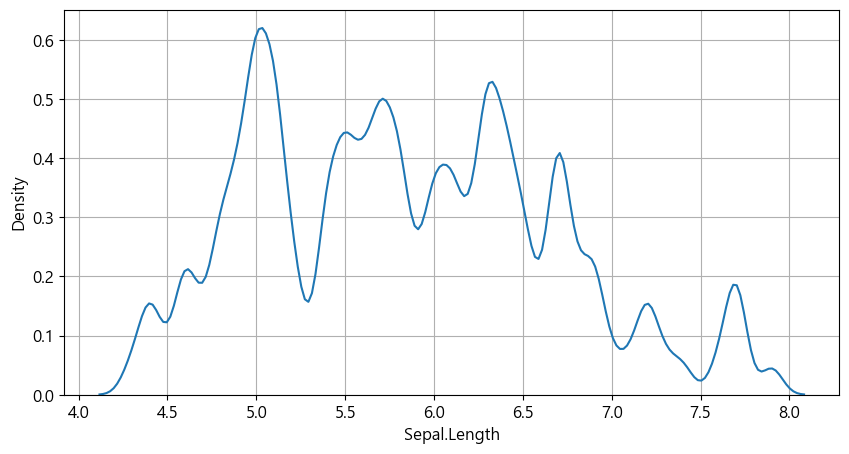

In [14]:
plt.figure(figsize=(10, 5), dpi=100)
sb.kdeplot(data=df, x="Sepal.Length", bw_adjust=0.2)
plt.grid()
plt.show()
plt.close()

#### (2) 파장 감소

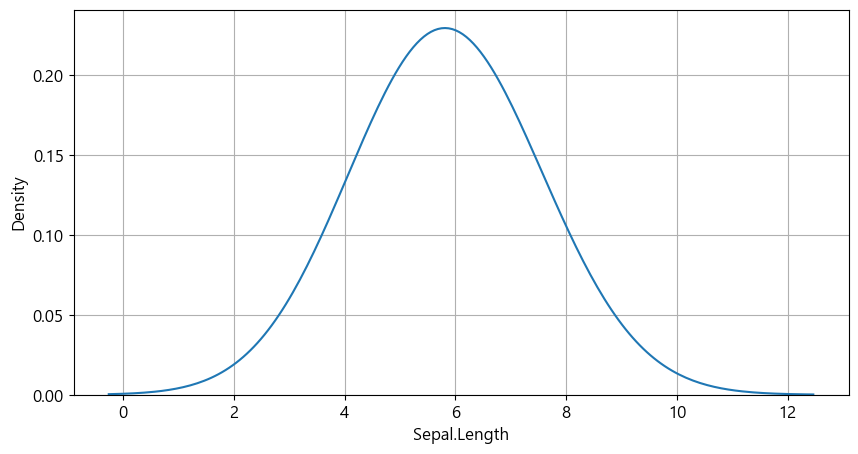

In [15]:
plt.figure(figsize=(10, 5), dpi=100)
sb.kdeplot(data=df, x="Sepal.Length", bw_adjust=5)
plt.grid()
plt.show()
plt.close()

### [6] 범주에 따른 구분

`hue` 파라미터에 명목형 변수의 이름을 지정하면 범주에 따라 그래프를 분기한다.

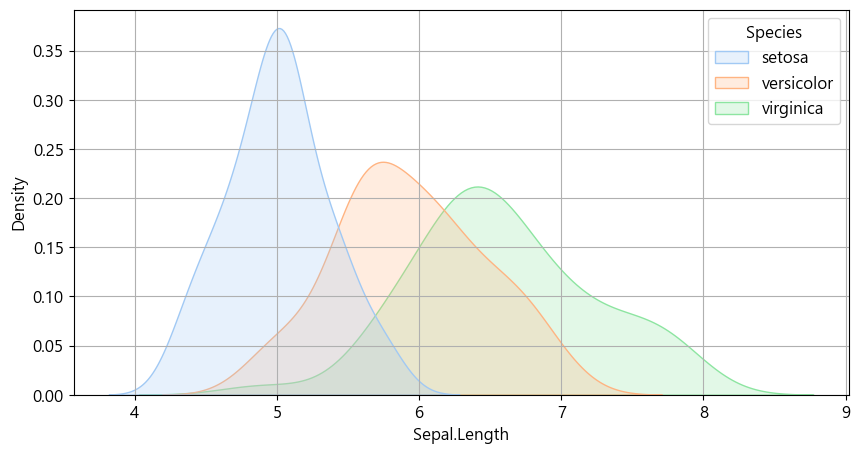

In [16]:
plt.figure(figsize=(10, 5), dpi=100)
sb.kdeplot(data=df, x="Sepal.Length", fill=True, palette="pastel", hue="Species")
plt.grid()
plt.show()
plt.close()

## #03. 이변량 커널 밀도

### [1] 기본 사용 방법

$x$ 파라미터와 $y$ 파라미터를 모두 설정한다.

> $x$에 따른 $y$ 분포

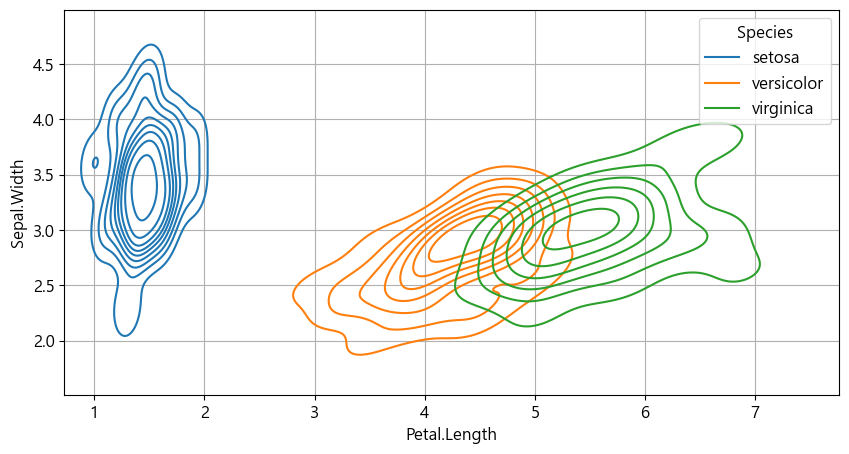

In [17]:
plt.figure(figsize=(10, 5), dpi=100)
sb.kdeplot(data=df, x="Petal.Length", y="Sepal.Width", hue="Species")
plt.grid()
plt.show()
plt.close()

### [2] 면 색상 채우기

`fill=True`를 설정한다.

분포 단계가 색의 진하기로 표현된다.

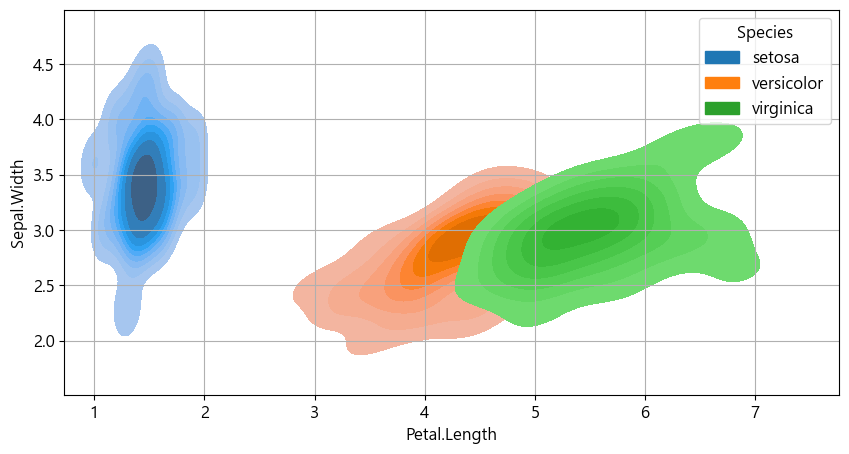

In [18]:
plt.figure(figsize=(10, 5), dpi=100)
sb.kdeplot(data=df, x="Petal.Length", y="Sepal.Width", hue="Species", fill=True)
plt.grid()
plt.show()
plt.close()

### [3] 분포 단계 조절하기

`levels` 파라미터를 설정한다.

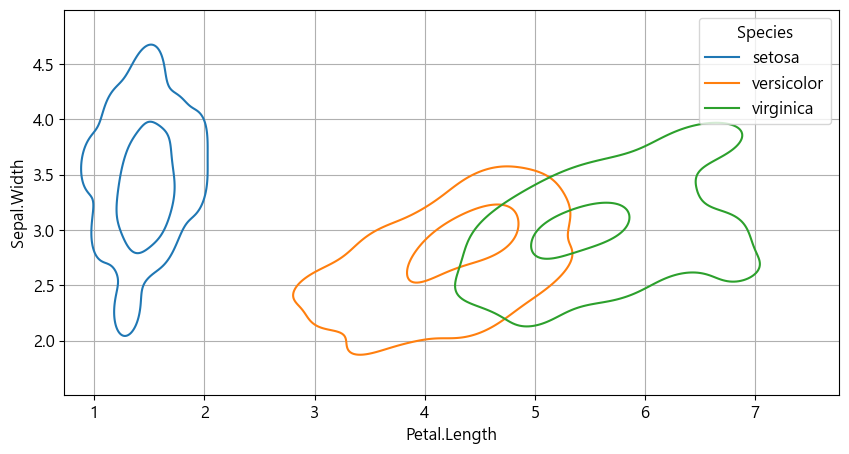

In [19]:
plt.figure(figsize=(10, 5), dpi=100)
sb.kdeplot(data=df, x="Petal.Length", y="Sepal.Width", hue="Species", levels=3)
plt.grid()
plt.show()
plt.close()

### [4] 산점도 그래프와 함께 표시하기

산점도 그래프에 `hue` 파라미터를 적용하여 집단별 분포를 함께 표시하면 데이터의 군집 형태를 좀 더 명확하게 확인할 수 있다.

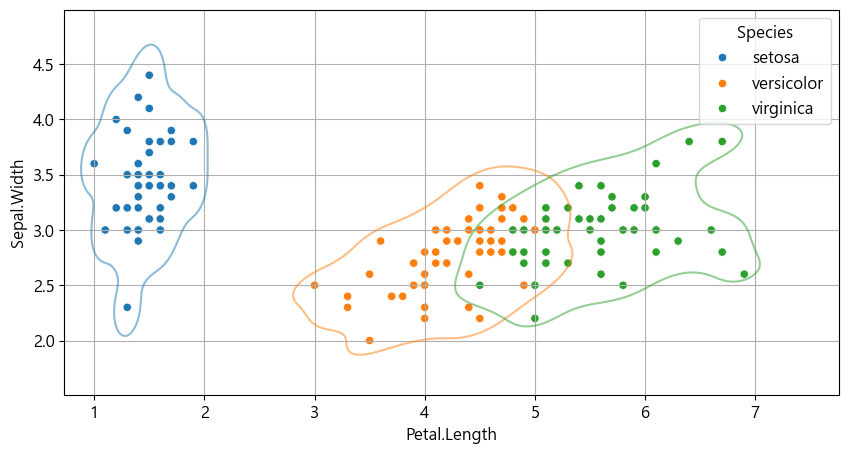

In [20]:
plt.figure(figsize=(10, 5), dpi=100)
sb.kdeplot(data=df, x="Petal.Length", y="Sepal.Width", hue="Species", levels=1, alpha=.5)
sb.scatterplot(data=df, x="Petal.Length", y="Sepal.Width", hue="Species")
plt.grid()
plt.show()
plt.close()

### [5] 면 색상 채우기

이변량 커널 밀도에 `fill=True`를 설정할 경우 `levels` 변수의 최소값은 `2`이다.

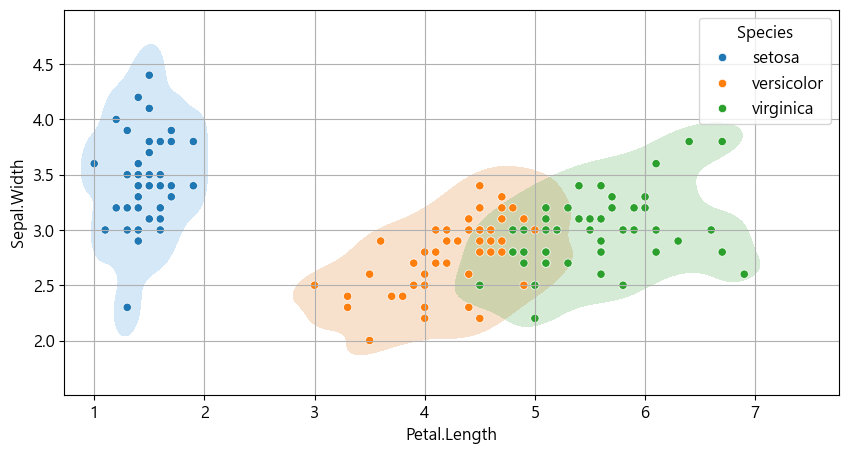

In [21]:
plt.figure(figsize=(10, 5), dpi=100)
sb.kdeplot(data=df, x="Petal.Length", y="Sepal.Width", hue="Species", levels=2, fill=True, alpha=.2)
sb.scatterplot(data=df, x="Petal.Length", y="Sepal.Width", hue="Species")
plt.grid()
plt.show()
plt.close()